<a href="https://colab.research.google.com/github/gshah8/UCF/blob/master/Machine_Learning/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 1 

This homework will get you up to speed with Python programming, numpy, matplotlib, Keras, gradients, partial derivatives, git, GitHub, Google's colaboratory etc. Have fun!

For this homework, you will create neural networks with an input layer and an output layer without any hidden layers. The connections are dense: each input neuron is connected to each output neuron.

Instructions for problems 1 and 2:
- Load the training and test data using Keras, no validation set needed.
- Train 10 classifiers that perform binary classification: *Is the input image the digit i or is it a digit different from i?* Each of the ten classifiers has an input layer consisting of 28 x 28 input neurons and an output layer consisting of a single output neuron.
- Implement mini-batch stochastic gradient descent using only numpy, that is, you are not allowed to use TensorFlow/Keras for SGD.
- Use ```argmax``` to determine the classifier with the strongest output and declare the corresponding digit as output.




###Loading data forall problems here

In [4]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()
#print(train_labels_original.shape)

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


###Functions and global variables to be used throughout the homework

In [0]:
m = 60000
n = 10000
image_size = 28*28

#Function for one-hot encoding
def one_hot_encoding(train_labels, test_labels):
  for i in range(m):
    train_labels[i][train_labels_original[i]] = 1
  for i in range(n):
    test_labels[i][test_labels_original[i]] = 1
  return train_labels, test_labels
    

#This function is called in Problems 1, 2 and 3
#This function reshapes, normalizes and adds biases to images
#it also performs one-hot encoding on labels
def load_data_bias():
  
  #Reshape and normalize train and test images
  train_images = train_images_original.reshape((m, image_size))
  train_images = train_images.astype('float32') / 255
  test_images = test_images_original.reshape((n, image_size))
  test_images = test_images.astype('float32') / 255
  
  #for adding bias to train and test images
  train_images_b = np.c_[np.ones((m, 1)), train_images]
  test_images_b = np.c_[np.ones((n, 1)), test_images]
  
  train_labels = np.zeros((m,10))
  test_labels = np.zeros((n,10))
  
  #one-hot encoding for labels
  train_labels, test_labels = one_hot_encoding(train_labels, test_labels)
  
  return train_images_b, train_labels,test_images_b, test_labels


def sigmoid(z):
  ans = 1/(1+np.exp(-z))
  return ans

def softmax(z):
  z_exp=np.exp(z)
  total=np.sum(z_exp,axis=1)
  return z_exp/total.reshape(z_exp.shape[0],1)

def test(z):
  z_exp=np.exp(z)
  total=np.sum(z_exp)
  return z_exp/total


## Problem 1
Use logistic regression with mean squared error loss.

In [0]:
train_images_b, train_labels,test_images_b, test_labels = load_data_bias()

In [0]:
#Initialize weight and weight_10 for 10 classifiers
np.random.seed(42)
initial_weight=np.zeros((image_size+1,1))
weight_10=np.zeros((image_size+1,10))   #weight_10 will store the weights of all 10 classifiers

In [0]:
epochs = 25
lr = 0.001
batch_size = 64
classifiers = 10

for j in range(classifiers):
  weight = initial_weight
  for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    train_images_b_shuffled = train_images_b[shuffled_indices]
    train_labels_shuffled = train_labels[:,j][shuffled_indices]   
    for i in range(0,m,batch_size):
      x_i = train_images_b_shuffled[i:i+batch_size]
      y_i = train_labels_shuffled[i:i+batch_size]
      y_i = y_i.reshape((y_i.size,1))
      z = x_i.dot(weight)
      a = sigmoid(z)
      dlda = a-y_i
      dadz=a*(1-a)
      dzdw = x_i
      gradient = 1/batch_size * x_i.T.dot(dadz*dlda)  #gradient based on mean-squared error loss function
      weight = weight - lr * gradient    #update weights
  weight_10[:,j] = weight.reshape(785,)
  

In [94]:
#calculate accuracy of model on the entire training data
z_train = train_images_b.dot(weight_10)
a_train = sigmoid(z_train)

mylabels=np.argmax(a_train,axis=1)
print("Precision of the model (containing all classifers) on the Training Data")
for i in range(10):
  label_i=train_labels_original==i
  total_i=sum(label_i)
  mytotal=mylabels[label_i]
  mytotalok=sum(mytotal==i)
  print("Digit ", i, ", Precision = ", mytotalok/total_i)

Precision of the model (containing all classifers) on the Training Data
Digit  0 , Precision =  0.9382069897011649
Digit  1 , Precision =  0.9635123108869772
Digit  2 , Precision =  0.8039610607586438
Digit  3 , Precision =  0.8514108628282498
Digit  4 , Precision =  0.8632317699418007
Digit  5 , Precision =  0.5185390149418926
Digit  6 , Precision =  0.9254815816154106
Digit  7 , Precision =  0.8810853950518756
Digit  8 , Precision =  0.6308323363527603
Digit  9 , Precision =  0.7312153303076148


In [95]:
#Calculate accuracy of model on the training data
z_train = train_images_b.dot(weight_10)
a_train = sigmoid(z_train)
print("Total Accuracy of Model on the Training Data")
a_train_numb=np.argmax(a_train,axis=1)
np.sum(a_train_numb==train_labels_original)/train_labels_original.shape[0]

Total Accuracy of Model on the Training Data


0.8159166666666666

In [96]:
#Calculate accuracy of model on the testing data
z_test = test_images_b.dot(weight_10)
a_test = sigmoid(z_test)
print("Total Accuracy of Model on the Testing Data")
a_test_numb=np.argmax(a_test,axis=1)
np.sum(a_test_numb==test_labels_original)/test_labels_original.shape[0]


Total Accuracy of Model on the Testing Data


0.8251

## Problem 2
Use logistic regression with binary cross entropy loss.

In [0]:
train_images_b, train_labels,test_images_b, test_labels = load_data_bias()

In [0]:
#Initialize weight and weight_10 for 10 classifiers
np.random.seed(42)
initial_weight=np.zeros((image_size+1,1))
weight_10=np.zeros((image_size+1,10))    #weight_10 will store the weights of all 10 classifiers

In [0]:
epochs = 20
lr = 0.001
batch_size = 64
classifiers = 10

for j in range(classifiers):
  weight = initial_weight
  for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    train_images_b_shuffled = train_images_b[shuffled_indices]
    train_labels_shuffled = train_labels[:,j][shuffled_indices]   
    for i in range(0,m,batch_size):
      x_i = train_images_b_shuffled[i:i+batch_size]
      y_i = train_labels_shuffled[i:i+batch_size]
      y_i = y_i.reshape((y_i.size,1))
      z = x_i.dot(weight)
      a = sigmoid(z)
      dlda = a-y_i
      dadz=a*(1-a)
      dzdw = x_i
      gradient = 1/batch_size * x_i.T.dot(a - y_i)   #gradient based on binary cross-entropy loss function
      weight = weight - lr * gradient
  weight_10[:,j] = weight.reshape(785,)

In [101]:
#Calculate accuracy of model on the training data
z_train = train_images_b.dot(weight_10)
a_train = sigmoid(z_train)
print("Total Accuracy of Model on the Training Data")
a_train_numb=np.argmax(a_train,axis=1)
np.sum(a_train_numb==train_labels_original)/train_labels_original.shape[0]

Total Accuracy of Model on the Training Data


0.86455

In [102]:
#Calculate accuracy of model on the testing data
z_test = test_images_b.dot(weight_10)
a_test = sigmoid(z_test)
print("Total Accuracy of Model on the Testing Data")
a_test_numb=np.argmax(a_test,axis=1)
np.sum(a_test_numb==test_labels_original)/test_labels_original.shape[0]

Total Accuracy of Model on the Testing Data


0.8729

## Problem 3
- Load the training and test data using Keras, no validation set needed.
- Create network with an input layer consisting of 28 x 28 input neurons and an output layer consisting of 10 output neurons.
- Use softmax and categorical cross entropy loss.
- Implement mini-batch stochastic gradient descent using only numpy, that is, you are not allowed to use TensorFlow/Keras for SGD.

In [0]:
train_images_b, train_labels,test_images_b, test_labels = load_data_bias()

In [0]:
np.random.seed(42)
#initial_weight = np.random.randn(image_size+1,10)
initial_weight = np.zeros((image_size+1,10))
weight_path_mgd = []
batch_size = 40
#initial_weight

In [0]:
epochs = 20
lr = 0.001
weight = initial_weight

weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    train_images_b_shuffled = train_images_b[shuffled_indices]
    train_labels_shuffled = train_labels[shuffled_indices]
    for i in range(0, m, batch_size):
      x_i = train_images_b_shuffled[i:i+batch_size]
      y_i = train_labels_shuffled[i:i+batch_size]
      z = x_i.dot(weight)
      a = softmax(z)        
      gradient = 1/batch_size * x_i.T.dot(a - y_i)
      weight = weight - lr * gradient
      weight_path_mgd.append(weight) 

In [0]:
#For Training and Testing Accuracy

mt=test_labels_original.shape[0]
predicted_labels_test_raw=test(test_images_b.dot(weight))  
print(predicted_labels_test_raw.shape)
predicted_labels_test=np.argmax(predicted_labels_test_raw,axis=1)
print(predicted_labels_test.shape)
print(test_labels_original.shape)
predicted_labels_test = predicted_labels_test.astype('uint8')
test_labels_original=test_labels_original.astype('uint8')

wrong_indices_test = [i for i in range(mt) if predicted_labels_test[i] != test_labels_original[i]]
# The quantity below is equal to the test accuracy reported by the network fit method.
acc_test=1.0 - len(wrong_indices_test) / mt
print("Test acc= ",acc_test)

(10000, 10)
(10000,)
(10000,)
Test acc=  0.8929


## Problem 4
Reimplement the network from Problem 3 entirely in Keras.

In [0]:
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
#train_images_original.shape

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)
#test_labels

In [0]:
from keras import models
from keras import layers

network = models.Sequential()
#network.add(layers.Dense(28*28, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax',input_shape=(28 * 28,)))
network.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [0]:
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [0]:
epochs = 10
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 66us/step - loss: 1.2907 - acc: 0.6877 - val_loss: 0.8149 - val_acc: 0.8295
Epoch 2/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.7196 - acc: 0.8384 - val_loss: 0.6082 - val_acc: 0.8611
Epoch 3/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.5885 - acc: 0.8581 - val_loss: 0.5254 - val_acc: 0.8719
Epoch 4/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.5259 - acc: 0.8678 - val_loss: 0.4793 - val_acc: 0.8811
Epoch 5/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.4879 - acc: 0.8746 - val_loss: 0.4491 - val_acc: 0.8860
Epoch 6/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.4618 - acc: 0.8798 - val_loss: 0.4277 - val_acc: 0.8902
Epoch 7/10
60000/60000 [==============================] - 2s 35us/step - loss: 0

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

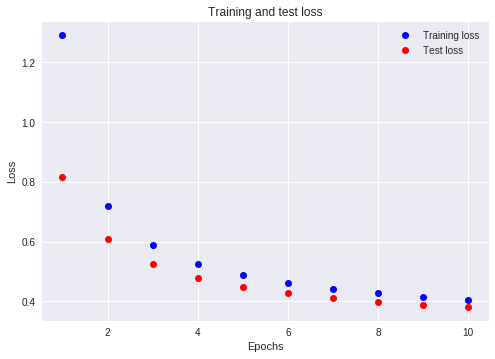

In [0]:

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

###Add a plot for training and test loss

In [0]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 47us/step
Test accuracy: 0.8982


## Problem 5
Extend the network from Problem 4 by adding new features.
- Round the grey values of the images to 1 and 0 so you obtain black and white images. Add as an additional feature the number of white regions. For instance, a typical 0 has 2 white regions and 8 has 3. Use the following neighborhoods for pixels:

```
pixel x,y (indicated by .) is connected to its neighbors (indicated by o):

 o
o.o  
 o
 
ooo
o.o
ooo
```
- Consider the width.
- Consider the height.
- Come up with other features.

You should normalize your new features so that they are at the same scale as the pixel values (between 0 and 1).

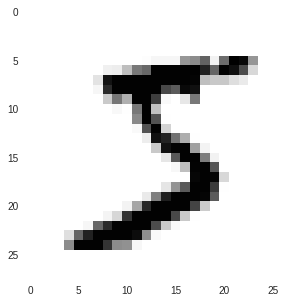

In [0]:
#Before Normalizing the image pixels
digit_0 = train_images_original[0]
digit_0.shape
plt.figure(figsize=(5,5))
plt.imshow(digit_0)
plt.grid(None)
plt.show()

In [0]:
label_0 = train_labels_original[0]
print(label_0)

for i in range(train_labels_original.shape[0]):
  if train_labels_original[i] == 8:
    break
i
    

5


17

In [0]:
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

(28, 28)


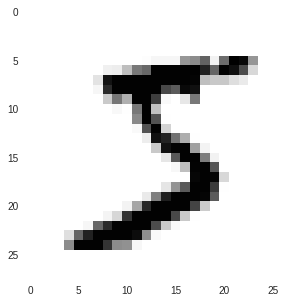

In [0]:
#before filtering
digit_0 = train_images[0]
digit_0 = digit_0.reshape((28,28))
print(digit_0.shape)
plt.figure(figsize=(5,5))
plt.imshow(digit_0)
plt.grid(None)
plt.show()

In [0]:
#Filtering all images by rounding off

#For now just use double for loops. Change it later to a built-in function
train_images_f = train_images
for i in range(train_images.shape[0]):
  for j in range(train_images.shape[1]):
    if train_images[i][j] <0.5:
      train_images_f[i][j] = 0
    else:
      train_images_f[i][j] = 1
      
test_images_f = test_images
for i in range(test_images.shape[0]):
  for j in range(test_images.shape[1]):
    if test_images[i][j] <0.5:
      test_images_f[i][j] = 0
    else:
      test_images_f[i][j] = 1

    
      

(28, 28)


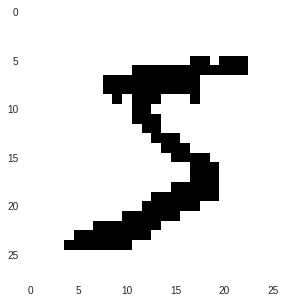

In [0]:
#after filtering
digit_0 = train_images[0]
digit_0 = digit_0.reshape((28,28))
print(digit_0.shape)
plt.figure(figsize=(5,5))
plt.imshow(digit_0)
plt.grid(None)
plt.show()

In [0]:
#Functions for calculating the number of connected components
# A function to check if a given cell  
# (row, col) can be included in DFS 
def is_valid(mat_2d, i, j, visited, row, col): 
    # row number is in range, column number 
    # is in range and value is 1  
    # and not yet visited 
    return (i >= 0 and i < row and j >= 0 and j < col and 
            not visited[i][j] and mat_2d[i][j] == 0) 


# A utility function to do DFS for a 2D  
# boolean matrix. It only considers 
# the 8 neighbours as adjacent vertices 
def DFS(mat_2d, i, j, visited, row, col): 

    # These arrays are used to get row and  
    # column numbers of 8 neighbours  
    # of a given cell 
    rowNbr = [-1, -1, -1,  0, 0,  1, 1, 1]; 
    colNbr = [-1,  0,  1, -1, 1, -1, 0, 1]; 

    # Mark this cell as visited 
    visited[i][j] = True

    # Recur for all connected neighbours 
    for k in range(8): 
        if is_valid(mat_2d, i + rowNbr[k], j + colNbr[k], visited, row, col): 
            DFS(mat_2d, i + rowNbr[k], j + colNbr[k], visited, row, col)             
            
def num_connected_comp(mat_2d, row, col): 
    # Make a bool array to mark visited cells. 
    # Initially all cells are unvisited 
    visited = [[False for j in range(col)]for i in range(row)] 

    # Initialize count as 0 and travese  
    # through the all cells of 
    # given matrix 
    count = 0
    for i in range(row): 
        for j in range(col): 
            # If a cell with value 1 is not visited yet,  
            # then new island found 
            if visited[i][j] == False and mat_2d[i][j] ==0: 
                # Visit all cells in this island  
                # and increment island count 
                DFS(mat_2d, i, j, visited, row, col)
                #print(count)
                count += 1
    return count

(28, 28)


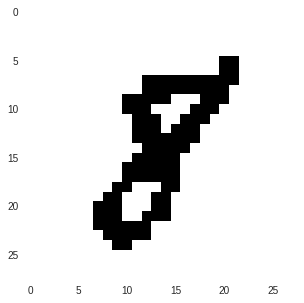

row =  28 col =  28


3

In [0]:
#Trying out the above connected component function for 1 image

digit_1 = train_images_f[17]
digit_1 = digit_1.reshape((28,28))
print(digit_1.shape)
plt.figure(figsize=(5,5))
plt.imshow(digit_1)
plt.grid(None)
plt.show()

#first reshape the image into 28x28
mat_2d = digit_1
row = mat_2d.shape[0]
col = mat_2d.shape[1]
#print("train_images_f[0].shape=",train_images_f[0].shape)
print("row = ", row, "col = ", col)
result = num_connected_comp(mat_2d, row, col)
result

In [0]:
#Now calculate number of white regions for all the training images
m  = 60000
n = 10000

cc_feature_train = np.empty((m,1))
fraction_1s_feature_train = np.empty((m,1))
fraction_0s_feature_train = np.empty((m,1))
#print(cc_feature.shape)
for i in range(m):
  fraction_1s_feature_train[i] = ((train_images_f[i]==1).sum())/train_images_f[i].shape[0]
  fraction_0s_feature_train[i] = 1 - fraction_1s_feature_train[i]
  mat_2d = train_images_f[i].reshape((28,28))
  row = mat_2d.shape[0]
  col = mat_2d.shape[1]
  cc_feature_train[i] = num_connected_comp(mat_2d, row, col)

cc_feature_test = np.empty((n,1))
fraction_1s_feature_test = np.empty((n,1))
fraction_0s_feature_test = np.empty((n,1))
#print(cc_feature_test.shape)
for i in range(n):
  fraction_1s_feature_test[i] = ((test_images_f[i]==1).sum())/test_images_f[i].shape[0]
  fraction_0s_feature_test[i] = 1 - fraction_1s_feature_test[i]
  mat_2d = test_images_f[i].reshape((28,28))
  row = mat_2d.shape[0]
  col = mat_2d.shape[1]
  cc_feature_test[i] = num_connected_comp(mat_2d, row, col)
  

In [0]:
#cc_feature_train[17]
print(fraction_1s_feature_train[0])
print(fraction_0s_feature_train[0])

[0.14158163]
[0.85841837]


In [0]:
#now normalize cc_feature_train
max_cc_val = np.max(cc_feature_train)
cc_feature_train_norm = cc_feature_train / max_cc_val
cc_feature_train_norm.shape

#now normalize cc_feature_test
max_cc_val = np.max(cc_feature_test)
cc_feature_test_norm = cc_feature_test / max_cc_val
#cc_feature_train_norm.shape

In [0]:
#Add new features to training images
train_images_f_cc = np.c_[cc_feature_train_norm, fraction_1s_feature_train, fraction_0s_feature_train, train_images_f]
#train_images_f_cc.shape

#Add this extra feature to test images
print(cc_feature_test_norm.shape)
print(test_images_f.shape)
test_images_f_cc = np.c_[cc_feature_test_norm, fraction_1s_feature_test, fraction_0s_feature_test, test_images_f]
train_images_f_cc.shape



(10000, 1)
(10000, 784)


(60000, 787)

In [0]:
#doing one-hot encoding on the labels
train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

In [0]:
from keras import models
from keras import layers

network = models.Sequential()
#network.add(layers.Dense(28*28, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax',input_shape=(28 * 28+3,)))
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                7880      
Total params: 7,880
Trainable params: 7,880
Non-trainable params: 0
_________________________________________________________________


In [0]:
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [0]:
epochs = 15
history = network.fit(train_images_f_cc, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images_f_cc, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 32us/step - loss: 1.2386 - acc: 0.6995 - val_loss: 0.7924 - val_acc: 0.8256
Epoch 2/15
60000/60000 [==============================] - 2s 33us/step - loss: 0.7036 - acc: 0.8359 - val_loss: 0.6012 - val_acc: 0.8574
Epoch 3/15
60000/60000 [==============================] - 2s 33us/step - loss: 0.5816 - acc: 0.8554 - val_loss: 0.5240 - val_acc: 0.8732
Epoch 4/15
60000/60000 [==============================] - 2s 33us/step - loss: 0.5223 - acc: 0.8659 - val_loss: 0.4801 - val_acc: 0.8793
Epoch 5/15
60000/60000 [==============================] - 2s 32us/step - loss: 0.4859 - acc: 0.8727 - val_loss: 0.4511 - val_acc: 0.8837
Epoch 6/15
60000/60000 [==============================] - 2s 33us/step - loss: 0.4606 - acc: 0.8777 - val_loss: 0.4306 - val_acc: 0.8880
Epoch 7/15
60000/60000 [==============================] - 2s 33us/step - loss: 0.4418 - acc: 0.8813 - val_loss: 0.4149 - val_acc

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

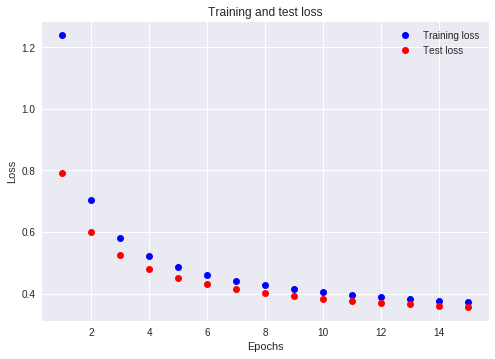

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
test_loss, test_acc = network.evaluate(test_images_f_cc, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 46us/step
Test accuracy: 0.9028


In [0]:
#Now adding more feature, i.e. no. of 1s and number of 0s in the training images
